# Visualizing the trough model
This notebook shows some ways to visualize the trough migration path and the underlying model. Two of the figures plot the modeled retreat as a function of time and lag (which is also a function of time).

## Background

The trough modeling code is used to describe the path of the bottom of an ice trough on Mars that underwent both accumulation and ice retreat. This made the bottom of the trough move around both horizontally and vertically. The tricky thing we deal with, is that we actually model the trough's migration _in reverse_, since as a function of time we only know where the bottom of the trough is now rather than when it first formed in the past.

The vertical path of the trough is quite simple, and depends only on the accumulation of ice
$$
y(t) = \int_{t_0}^{t}{\rm d}t\ f(I(t))\,,
$$
whre $I(t)$ is the insolation on the surface of Mars as a function of time, and $f()$ is some phenomenological parametric equation that connects the insolation to the vertical migration. Our task is to decide on appropriate forms for $f()$, be they constants, or polynomials or what have you, and then constrain the parameters in that model. In this way, the best way to visualize the vertical path is to plot $y$ vs. $I$, $y$ vs. $t$, $f$ vs $I$ and $f$ vs $t$.

Because the trough is tilted at an angle $\theta$, the horizontal migration also depends on $f$, and can be calculated after $y(t)$
$$
x(t) = \int_{t_0}^t{\rm d}t\ R(l(t),t)\sec\theta - f(I(t))\cot\theta\,,
$$
where $R(l(t),t)$ is called the _retreat_ of the ice, and is also calculated as a function of lag $l(t)$ and time $t$. The $\theta$ dependence appears because of the incidence angle of sunlight on the trough. When visualizing the retreat, we notice that the lag also explicitely depends on time $l(t)$, which we are modeling. Because of this fact, the best way to visualize our model is as a path through our 2D retreat, as shown below.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rc("text", usetex=True)
plt.rc("font", size=20, family="serif")

In [2]:
import mars_troughs as mt
print("Creating a trough object.")
test_acc_params = [1e-8, 5e-9]
acc_model_number = 1
test_lag_params = [1, 1e-5]
lag_model_number = 1
errorbar = 100.
tr = mt.Trough(test_acc_params, test_lag_params,
                acc_model_number, lag_model_number,
                errorbar)

Creating a trough object.


## Retreat slice plot
The retreat as a function of time and lag can be visualized using a heatmap plot. We can show a heatmap of all possible retreats as a function of time and lag $R(t, l(t))$ and then plot the trajectory the trough takes in $(t,l(t))$ space. The top panel shows the retreat value that the model has at that exact time, or the value of the retreat along the white line.

(16, 5001) (16, 5001)


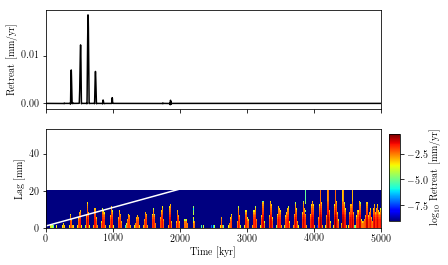

In [3]:
t = tr.ins_times/1e3
l = tr.lags
r = tr.retreats
T,L = np.meshgrid(t,l)
r[r==0] = 1e-9
print(T.shape, L.shape)
fig, ax = plt.subplots(ncols=1, nrows=2, sharex=True)
#plt.imshow(r.T, cmap='jet')
#sns.heatmap(np.log10(r))
im = ax[1].pcolormesh(T, L, np.log10(r), cmap='jet')
ax[1].set_xlabel("Time [kyr]")
ax[1].set_ylabel("Lag [mm]")

lm = tr.lags_t
rm = tr.Retreat_model_at_t
ax[1].plot(t, lm, c='white')
ax[0].plot(t, rm, c='k')
ax[0].set_ylabel("Retreat [mm/yr]")
ax[0].set_xlim(min(t),max(t))
cbax = fig.add_axes([0.92, 0.15, 0.025, 0.3])
cbar = fig.colorbar(im, cax=cbax)
cbar.set_label(r"$\log_{10}$ Retreat [mm/yr]")

## Retreat model vs possible retreats
We have on hand the retreat at a series of pre-determined lag values. It is useful to visualize the retreat model in comparison to these possible retreats for the various *constant* lag values, or horizontal slices across the retreat array.

Text(0, 0.5, 'Retreat [mm/yr]')

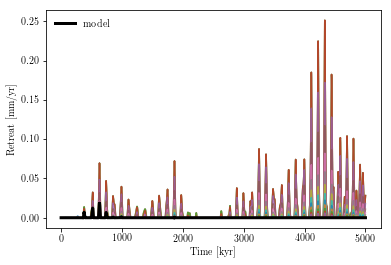

In [4]:
retreats = tr.retreats
for i,li in enumerate(l):
    plt.plot(t, retreats[i], alpha=0.7)
plt.plot(t, rm, c='k', ls='-', lw=3, label='model')
plt.legend(loc=0, frameon=False)
plt.xlabel("Time [kyr]")
plt.ylabel("Retreat [mm/yr]")